# **Table of Contents**
* [Confidence Interval](#section_1)
* [Sampling Error](#section_2)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

import scipy.stats as stats

import warnings
warnings.simplefilter("ignore")

<a id='section_1'></a>
# **1. Confidence Interval**

* Range in which the value of a population parameter is likely to lie with certain probability.

# **Q1**

* Hours spent on studies by 20 students on a course is given.
* Assume that the population of hours spent follows a normal distribution and the standard deviation is 3.1 hours.
* Calculate the 90% confidence interval for the mean hours spent by the students

In [2]:
h  =  np.array  ( [4.7,9.2,9.3,11.2,8,7.6,7.4,4.9,9.2,5.3,1.7,2.8,7.2,12.3,8.6,10.6,9,5.7,6.9,3.8] )

stats.norm.interval  ( 0.90,  h.mean() ,  3.1/np.sqrt(20) )

(6.129818597900822, 8.410181402099179)

# **Q2**

* A sample of 100 diabetic patients was chosen to estimate the length of stay of a patient at a hospital. 
* The sample mean was 4.5 days and the SD was 1.2 days
* Calculate the 99% confidence interval for the population mean.

In [3]:
stats.norm.interval (0.99,  4.5,  1.2/np.sqrt(100))

(4.190900483574132, 4.809099516425868)

# **Q3**

Pencils manufactured by Nataraj company is expected to have a mean length of 172 mm and the standard deviation of the length is 0.02 mm.
To ensure the quality, a sample is selected at periodic intervals to determine whether the length is still 172 mm meet the quality standards set by the company.You select a random sample of 100 pencils follows a normal distribution and the mean is 170 mm.

* Construct a 99% confidence interval for the pencil length.

In [4]:
stats.norm.interval ( 0.99,  170,  0.02/np.sqrt(100) )

(169.9948483413929, 170.0051516586071)

# **Q 4**

A medical pharmacy was interested in finding the proportion of customers who pay cash for their medicines as against digital cash or plastic money.

From a sample of 200 customers, it was found that 140 customers paid by cash. 

* Calculate the 95% confidence interval for proportions who pay by cash.

In [5]:
import   statsmodels.stats.proportion    as   SMP

In [6]:
n           =  200
n_success   =  140

SMP.proportion_confint  ( count = n_success , nobs = n , alpha = 0.05 , method = 'normal' )

(0.6364899081898882, 0.7635100918101118)

# **Q 5**

A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 women with glaucoma was chosen. 
Mean = 140 mm Hg . Standard Deviation =  25 mm Hg.

*	Calculate the estimated standard error of the sample mean.

*	Calc 95% confidence interval

*	Instead of 200 , only 100 were choosen. Calc 95% confidence interval.

In [7]:
n     =  200
x_bar =  140
sigma =  25
df    =  n-1

In [8]:
SE  =  sigma / np.sqrt(n)

stats.t.interval ( 0.95 ,  loc = x_bar ,  scale = SE ,  df = n-1 )

(136.51404038839016, 143.48595961160984)

In [9]:
n2   =  100

SE2  =  sigma / np.sqrt(n2)

stats.t.interval ( 0.95  ,  loc = x_bar  ,  scale = SE2  ,  df = n2-1 )

(135.03945762122828, 144.96054237877172)

> Comments

        * CI inc with dec in sample size

In [10]:
print (SE)
print (SE2)

1.7677669529663687
2.5


> Comments

        * When the sample size increases, it moves towards attaining the population size, 
        * Hence , sample mean tends to move towards the population mean
        * Hence , SE decreases with increase in sample size

<a id='section_2'></a>
# **2. Sampling error**

* Statistical error that occurs when a sample does not represent the entire population. 
* Then , results found in the sample do not represent the results that would be obtained from the entire population.

# **Q1**

From the given Population & Sample data :

In [11]:
np.random.seed(10)

p1  =  stats.poisson.rvs ( loc=18 , mu=35 , size=150000 )
p2  =  stats.poisson.rvs ( loc=18 , mu=10 , size=100000 )

p   =  np.concatenate (( p1, p2 ))

In [12]:
np.random.seed(6)

s  =  np.random.choice (a = p , size = 500)            # Sample 500 values

* Plot  population data and sample data. Infer.
* Calculate a 95% confidence to estimate the mean of the population

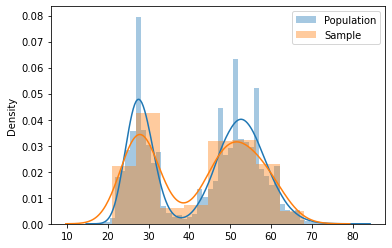

In [13]:
sns.distplot ( p ,  label='Population')
sns.distplot ( s ,  label='Sample')

plt.legend()
plt.show()

* Sampling dist is similar to Population dist

In [14]:
print ( s.mean() )

print ( stats.norm.interval ( 0.95 ,  s.mean() ,  p.std() / np.sqrt(500)  )   )

42.388
(41.22843548585789, 43.54756451414211)


## **Q2**

* Given the population data and sample data.
* Calculate sampling error and standard error

In [15]:
p  =  [ 60,80,70,75,80,90,100,100,65,75,60,90,70,70,80,50,55,60,70,65,70,55,50,65,70,
        65,70,65,75,80,90,95,95,85,90,80,75,70,80,85,90,80,75,70,60,65,70,80,75,80,90,
        65,80,65,70,85,75,70,80,85,65,70,85,80,65,70,80,90,100,60,70,55,60,70,70,70,80,
        85,90,80,75,70,60,65,70,80,75,80,90,70,85,80,65,70,80,90,100,60,70,80 ]

s  =  [ 90,100,100,65,75,60,90,70,65,70,65,70,65,60,70,85,65,70,85,80,65,70,80,65,70 ]

**Sampling Error**

In [16]:
np.mean(p) - np.mean(s)

0.9500000000000028

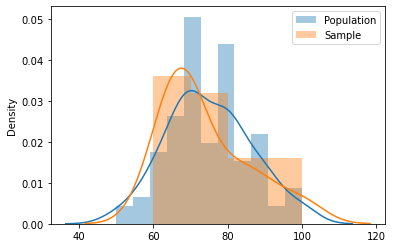

In [17]:
sns.distplot ( p ,    label='Population')
sns.distplot ( s ,    label='Sample')

plt.legend()
plt.show()

**Standard Error**

In [18]:
sigma   =  np.std (p)

sqrt_n  =  np.sqrt(len(s))

print (sigma / sqrt_n)

2.2605087922854894


* Standard errors can be eliminated by<br>
        * Increasing sample size 
        * Decreasing sampling error. 